# 综合案例-汽车销售数据分析

## 1.市场需求：各年度汽车总销量及环比，各车类、级别车辆销量及环比
## 2.消费能力、价位认知：车辆销售规模及环比、不同价位车辆销量及环比
## 3.企业/品牌竞争：车系、厂商、品牌销量及环比，市场占有率
## 4.热销车型 ：车型、车类、级别的销售top值

In [1]:
# 查看汽车数据，研究可以分析的维度

import pandas as pd
import numpy as np

sales=pd.read_csv('d:/aa/car_selling.csv',encoding='gbk',index_col=0) #0列作为所有数据的索引   
#数据查看，预处理
sales.head()
type(sales['时间'][0])   # 时间系列中，元素本为字符串

sales['时间']=pd.to_datetime(sales['时间'])
type(sales['时间'][0])   # 将“时间”列改为时间戳，以便后续分析


sales['年份']=sales['时间'].dt.year  #以便后续分析环比数据（本期比上期）
sales['品牌'].unique()  #结果为去重数组
# '''array(['起亚', '丰田', '长安自主', '现代', '吉利', '比亚迪', '别克', '福特', '日产', '本田',
#        '斯柯达', '大众', '雪铁龙', '雪佛兰', '瑞虎', '荣威', '名爵', '领克', '捷途', '哈弗',
#        '传祺', '标致', '奔驰', '宝马', '宝骏', '奥迪', '马自达', '艾瑞泽', '凯迪拉克', 'WEY'],
#       dtype=object)'''

sales['城市'].unique()


# 增加档次列，对数据进行分箱
# pd.cut为分箱函数，其作用是将连续数据变为离散数据（等级数据）
# 将价格列均分为5等份，按从高到低列为['低档','中档','中高档','高档','豪华'] 5个档次 



sales.head(3)  #7700多行数据，时间跨度15.01~19.06

,车系,厂商,车类,品牌,车型,级别,价格,时间,销量,销售规模（亿）,省份,城市,年份
I8a8a4ca2016dfb9ffb9f77ba016e1155772543c7,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-06-30,2955,5.0235,江苏,盐城,2019
I8a8a4ca2016dfb9ffb9f77ba016e1155772843cc,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-05-31,5680,9.6560,江苏,盐城,2019
I8a8a4ca2016dfb9ffb9f77ba016e1155772a43d1,韩系,东风悦达起亚,SUV,起亚,智跑,紧凑,17,2019-04-30,8707,14.8019,江苏,盐城,2019


In [2]:
sales['年份'].unique()

array([2019, 2018, 2017, 2016, 2015], dtype=int64)

In [3]:
# 1.拿出年份和销量两列，统计年度总销量并计算年份的环比值

sales_data=sales[['年份','销量']].groupby('年份').agg('sum')  #sales_data为只有“销量”一列的数据框，“年份”是索引

sales_data


,销量
年份,
2015,14594487
2016,16952990
2017,17576436
2018,17568751
2019,7464071


In [4]:
# 求增长量：
sales_data['diff']=sales_data.diff()  #差分函数，按设置的间隔，将当前列（行）与指定间隔行（列）做差,diff()等价diff(1)，表示相邻行
                   #diff(2) 表格隔一行，如3和1,5和3

sales_data

,销量,diff
年份,,
2015,14594487,NaN
2016,16952990,2358503.0
2017,17576436,623446.0
2018,17568751,-7685.0
2019,7464071,-10104680.0


In [5]:
sales_data['diff'].values[1:]
sales_data['销量'].values[:-1]

array([14594487, 16952990, 17576436, 17568751], dtype=int64)

In [6]:
# 思考：增长率应该怎么求
import numpy as np
# 下面这句执行的结果，就是按行索引对应相除了 （能否达到要求？？）
sales_data['环比增长率']= [np.nan] +list(  sales_data['diff'].values[1:] / sales_data['销量'].values[:-1])
sales_data


,销量,diff,环比增长率
年份,,,
2015,14594487,NaN,NaN
2016,16952990,2358503.0,0.161602
2017,17576436,623446.0,0.036775
2018,17568751,-7685.0,-0.000437
2019,7464071,-10104680.0,-0.575151


In [7]:
# 求15~19的环比增长率
import numpy as np

sales_data['环比增长率2']=sales_data['销量'].pct_change()

sales_data['环比增长率3']=sales_data['diff'][1:]/sales_data['销量'].shift(1) #shift()函数表示移动数据，不移动索引
#shift()等价shift(1)下移一行，shift(-1)上移一行，空白行用 nan 补位

sales_data  #得到年度销量及环比增长数据

,销量,diff,环比增长率,环比增长率2,环比增长率3
年份,,,,,
2015,14594487,NaN,NaN,NaN,NaN
2016,16952990,2358503.0,0.161602,0.161602,0.161602
2017,17576436,623446.0,0.036775,0.036775,0.036775
2018,17568751,-7685.0,-0.000437,-0.000437,-0.000437
2019,7464071,-10104680.0,-0.575151,-0.575151,-0.575151


## 插播：pct_change()

In [8]:
# 插播：pct_change()
df = pd.DataFrame({"A":[14, 4, 5, 4, 1, 55], 
                   "B":[5, 2, 54, 3, 2, 32],  
                   "C":[20, 20, 7, 21, 8, 5]})
df

,A,B,C
0,14,5,20
1,4,2,20
2,5,54,7
3,4,3,21
4,1,2,8
5,55,32,5


In [9]:
df.pct_change() # 等价于 df.pct_change(axis='index') # 默认行方向上的环比

#环比一定有空值，可以用0填充（不推荐），可以设定格式（推荐）
# df.pct_change().fillna(0).applymap(lambda x: format(x,".2%"))

,A,B,C
0,NaN,NaN,NaN
1,-0.714286,-0.600000,0.000000
2,0.250000,26.000000,-0.650000
3,-0.200000,-0.944444,2.000000
4,-0.750000,-0.333333,-0.619048
5,54.000000,15.000000,-0.375000


In [10]:
df.pct_change(axis='columns') #列方向的环比

,A,B,C
0,NaN,-0.642857,3.00000
1,NaN,-0.500000,9.00000
2,NaN,9.800000,-0.87037
3,NaN,-0.250000,6.00000
4,NaN,1.000000,3.00000
5,NaN,-0.418182,-0.84375


In [11]:
#思考：同比数据怎么算？（只要16,17,18三年数据）

#1.设置年月索引，取出时间和销量两列，且只要16,17,18三年数据

indx = (sales['年份']>2015)  & (sales['年份']<2019)

sales1 = sales[['时间','销量']][indx] # 筛选16~18年数据
sales1['年月'] = pd.PeriodIndex(sales1['时间'],freq='m') #增加年月
sales1

sales1_data = sales1[['年月','销量']].groupby('年月').agg('sum')


sales1_data['同比增长率'] = sales1_data['销量'].pct_change(12)*100
sales1_data

,销量,同比增长率
年月,,
2016-01,1504745,NaN
2016-02,914728,NaN
2016-03,1400538,NaN
2016-04,1216282,NaN
2016-05,1234913,NaN
2016-06,1248621,NaN
2016-07,1140831,NaN
2016-08,1295074,NaN
2016-09,1628209,NaN


In [12]:
# type(sales1_data['销量'].to_timestamp().year)
# sales1_data.index.to_timestamp().year
sales1_data.index.year.unique()  #取出索引中的年份

Int64Index([2016, 2017, 2018], dtype='int64', name='年月')

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

#【思考】取出2016~2018三年份数据，以季度为单位。画出三年4个季度的簇状柱形图

sales2=sales[['时间','销量']][ (sales['年份'] > 2015) & (sales['年份']< 2019) ]

# 获取季度信息

sales2['季度']=  pd.PeriodIndex(sales2['时间'],freq='q') #增加季度
sales2_data = (sales2[['季度','销量']].groupby('季度').agg('sum')/10000).round(1)
sales2_data

,销量
季度,
2016Q1,382.0
2016Q2,370.0
2016Q3,406.4
2016Q4,536.9
2017Q1,414.5
2017Q2,370.3
2017Q3,434.2
2017Q4,538.7
2018Q1,449.4


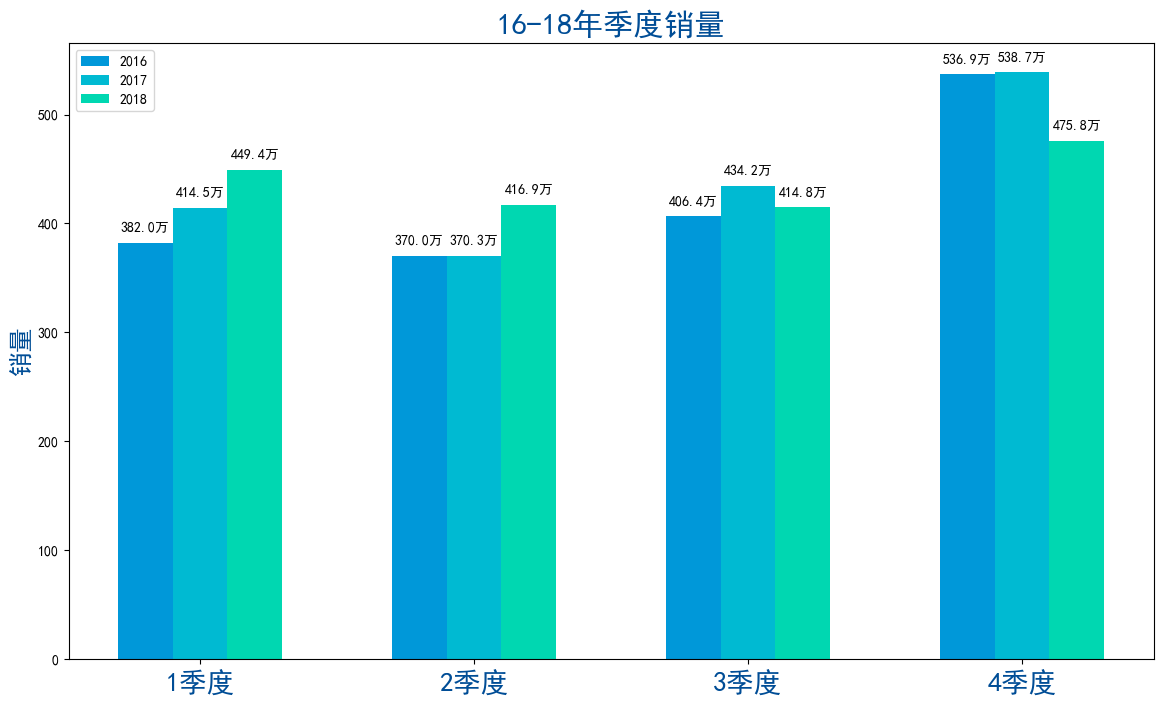

In [15]:
#1.画出横坐标为季度，纵坐标为销量的簇状柱形图

# 每一簇里面是三个年份的销量

plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
plt.figure(figsize=(14, 8))              #默认单位为英寸


#第一张图
#配色网：https://mycolor.space/
# peise=['#00C9A7', '#D3EAEC', '#ADC5CF']  #三个色系代表三个年份

peise=['#0098D9', '#00BAD2', '#00D7B1']  #三个色系代表三个年份

x=np.array([0,2,4,6])  #四个簇
y=sales2_data['销量']
bar_width=0.4

for i in range(3):
    plt.bar(x+i*bar_width,sales2_data['销量'][i*4:i*4+4], color=peise[i],width=bar_width)

xlist=['1季度','2季度','3季度','4季度']
plt.xticks(x+bar_width, xlist, color='#004D96', fontsize=20)  # x轴刻度说明，plt.xticks(x轴刻度位置，刻度名称，文字属性)

plt.ylabel('销量', fontsize=18,color='#004D96')


 # 【思考】为每个柱形加上数据标签
for a in range(3):    # 加数据标签
    for (i,j,k) in zip(range(4),sales2_data['销量'][a*4:a*4+4],sales2_data['销量'][a*4:a*4+4]) : 
        plt.text( 2*i+a*bar_width, j+10 ,"%.1f万" % k, fontsize=10, ha = 'center')

    

plt.title('16-18年季度销量', fontsize=22,color='#004D96')     
plt.legend(sales1_data.index.year.unique(),loc='upper left')

plt.show()


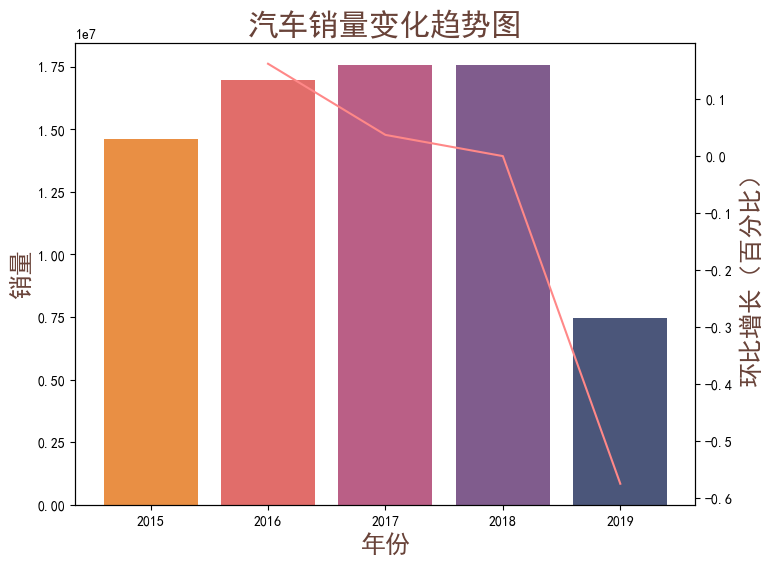

In [16]:
import matplotlib.pyplot as plt

#2 画图： 汽车销量趋势图：销量作柱形图，环比增长率做折线图，放入一个双y轴图中

def yyplot(x1=None, y1=None, x2=None, y2=None, ylabel='环比增长（百分比）', title='汽车销量变化趋势图'):         # 双Y轴图形绘制
    plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
    plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示
    fig = plt.figure(figsize=(8, 6))              #默认单位为英寸

    ax1 = fig.add_subplot(111)          # 添加第一张子图，111表示把原图分为1*1，子图在第一块区域
    #如改为：221，则表示原图分为2*2，子图占左上第一块区域
    
    #配色网：https://mycolor.space/
    #第一张图
    ax1.bar(x1, y1, color=['#E98F44', '#E16D6A', '#BA5F86', '#805C8D', '#4B567A'])

    ax1.set_ylabel('销量', fontsize=18,color='#694339')              # Y轴标题
    ax1.set_xlabel('年份', fontsize=18,color='#694339')              # x轴标题
    ax1.set_title(title, fontsize=22,color='#694339')                # 标题

    ax2 = ax1.twinx()                                # 共用x轴，Y轴显示不同
    ax2.plot(x2, y2, '#FF8888')                      # 折线图（x2年份，y2环比增长率）
    ax2.set_ylabel(ylabel, fontsize=18,color='#694339')
    plt.xticks(x1, x1, fontsize=18,color='#694339')  # x轴刻度
    plt.show()


yyplot(sales_data.index,sales_data['销量'],sales_data.index,sales_data['环比增长率']) #调用函数


In [14]:
#3.各类型车辆在各年份的销量情况（2015~2019年）
#  建立透视表，并绘相应柱状图



leibie
# leibie.index

年份,2015,2016,2017,2018,2019
车类,,,,,
MPV,409042,474380,442669,561307,215394
SUV,4821500,6058928,6871876,7111774,3094016
轿车,9363945,10419682,10261891,9895670,4154661


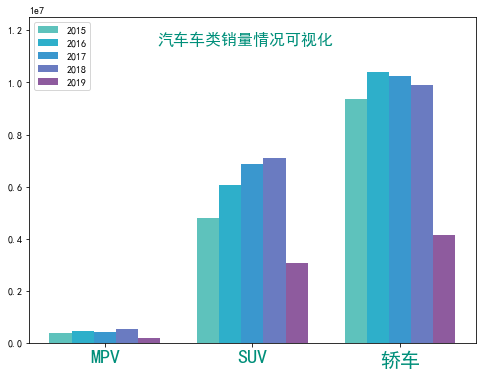

In [15]:
#4.定义多系列柱形图
#table：接受透视表，透视表的一行为柱形图的一个簇，列为一个系列柱
#x：接受数组，为每个簇的起点x坐标，本例x=np.array([0, 2, 4])#是x的起点位置
#colors:接受列表，为每个柱子的颜色
#title：接受字符串，为图形标题


def mybar(table=None,  x=None , bar_width=0.3, colors=None , title=None): #每张表的行数不确定，所以需要参数x来指定行数
    
    plt.figure(figsize=(8, 6))       # 画布尺寸    
    
    cols = table.columns             # 取出表中所有列（一列就是一个色柱）
        
    top = table.values.max()         # 取出表格数据的最大值,供设定坐标轴范围
    
    for i, j in enumerate(cols):     # i取序号，j获取列值
         plt.bar(x+i*bar_width, table[j], bar_width, color=colors[i])  #一次取一个年份的3个销量值
  
    plt.ylim(0, 1.2*top)                                 # 设置y轴取值范围
#   plt.legend(['{}年'.format(i) for i in cols])         # 添加图例
    plt.legend(table.columns)
    
    xlist=table.index
    plt.xticks(x+bar_width*2, xlist, color='#008F7A', fontsize=20)  # x轴刻度说明，plt.xticks(x轴刻度位置，刻度名称，文字属性)
   
    # 添加文字描述(x坐标，y坐标，字体，颜色，对齐方式)

    plt.text(np.median(x)+0.5,1.1*top, title, fontsize=16, color='#008F7A',  ha='center')
    plt.show()

t1='汽车车类销量情况可视化'
peise = ['#5EC2BC', '#2EAFCA', '#3A97CE', '#6A7BC1', '#8E5B9E']    # 各年份柱子的颜色，5个年份，5个颜色
mybar(table=leibie,x=np.array([0, 2, 4]),title=t1,colors=peise)

In [172]:
# 按档次统计销售额
dangci=

年份,2015,2016,2017,2018,2019
档次,,,,,
低档,9342714,11471026,11462927,11275949,4704832
中档,3146435,3417653,3734978,3788804,1621108
中高档,722252,1163153,1276544,1266065,529846
高档,449143,527120,672305,803842,417268
豪华,933943,374038,429682,434091,191017


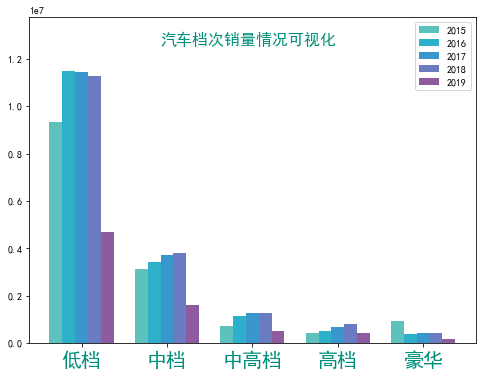

In [173]:
t1='汽车档次销量情况可视化'
peise = ['#5EC2BC', '#2EAFCA', '#3A97CE', '#6A7BC1', '#8E5B9E']    # 各年份柱子的颜色，5个年份，5个颜色
mybar(table=dangci,x=np.array([0, 2, 4, 6, 8]),title=t1,colors=peise) #此时变为5行，x列表长度也要对应变为5个起点

In [18]:
# 【练习】热销品牌top5统计
  


年份,2015,2016,2017,2018,2019
品牌,,,,,
WEY,0,0,86427,129136,36464
丰田,1444765,1023765,1125264,1245569,644532
传祺,129082,335912,457208,465826,146921
凯迪拉克,53086,105702,165532,219531,113519
别克,952201,1150190,1064685,862599,355131
吉利,0,669723,1176068,1316884,543035
名爵,0,0,7313,217618,93832
哈弗,616267,895744,776052,715279,340795
大众,2618420,2964571,3082742,3075075,1370120


品牌
大众    2618420
丰田    1444765
本田    1058246
现代    1028391
别克     952201
Name: 2015, dtype: int64
品牌
大众    2964571
别克    1150190
本田    1129075
现代    1100731
丰田    1023765
Name: 2016, dtype: int64
品牌
大众    3082742
本田    1348841
吉利    1176068
丰田    1125264
别克    1064685
Name: 2017, dtype: int64
品牌
大众    3075075
本田    1406411
吉利    1316884
丰田    1245569
日产    1086329
Name: 2018, dtype: int64
品牌
大众    1370120
本田     726226
丰田     644532
吉利     543035
日产     483827
Name: 2019, dtype: int64


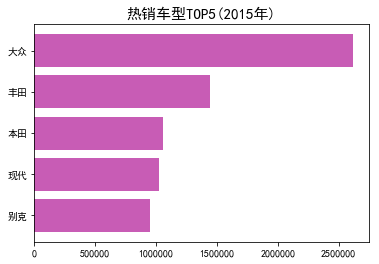

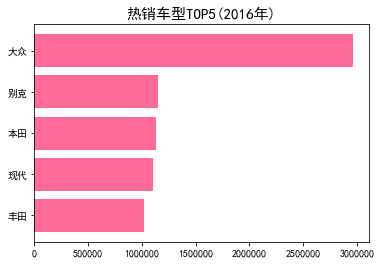

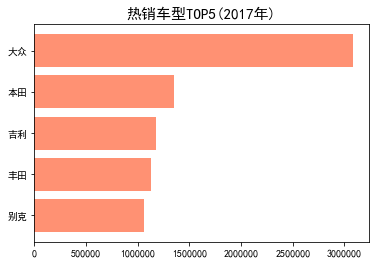

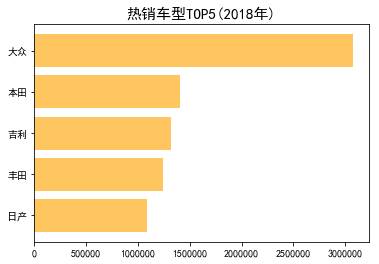

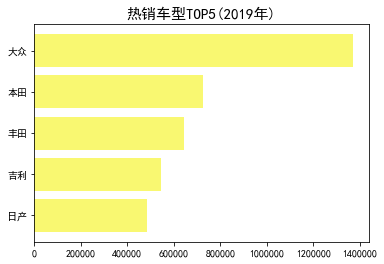

In [20]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'    #默认字体，黑体 
plt.rcParams['axes.unicode_minus'] = False    #正负号正常显示


peise=['#C85CB5','#FF6A96','#FF9173','#FFC55F','#F9F871']
for i in range(2015, 2020): #连续画5个柱形图
    plt.figure()     # 新建画布
    t5 = tops[i].sort_values(ascending=True)[-5:]       # 统计排序，取出排名前5的车型
    plt.barh(t5.index, t5, color=peise[i-2015])                  # 绘制柱状图
    plt.title('热销车型TOP5({}年)'.format(i), fontsize=15)   # 设置标题